In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from scnn.convertors import F2S, S2F
from scnn.bipolar_functions.operations import *

In [2]:
x_in = torch.rand(500,1,10) * 2 -1
y_in = torch.rand(500, 10,1) * 2 -1
(x_in@y_in).squeeze().shape

torch.Size([500])

In [68]:
def get_mae(seq_len, input_dim):
    
    f2s = F2S(seq_len)
    s2f = S2F()
    x_in = (torch.rand(500,input_dim) * 2 -1)/(2*input_dim**0.5)
    y_in = (torch.rand(500,input_dim) * 2 -1)/(2*input_dim**0.5)

    x_in_s = f2s(x_in)
    y_in_s = f2s(y_in)

    ground = (x_in * y_in).sum(-1) #shape = [500]

    mode = 'mux'
    if mode == 'mux':
        out = []
        for i in range(500):
            out.append(s2f(scaled_dot(x_in_s[i],y_in_s[i]))*input_dim)
        mae_1 = torch.abs(torch.stack(out) -ground).mean()
        
        # return mae

    mode = 'apc'
    if mode == 'apc':
        inputs = mul(x_in_s,y_in_s)
        v = ap_counter(in_features=input_dim, num_au_layers=0)(inputs)*2 - input_dim
        mae_2 = torch.abs(v.sum(dim=-1)/seq_len -ground).mean()
        

    mode = 'axpc'
    if mode == 'axpc':
        inputs = mul(x_in_s,y_in_s)
        v = ap_counter(in_features=input_dim, num_au_layers=1)(inputs)*2 - input_dim
        mae_3 = torch.abs(v.sum(dim=-1)/seq_len -ground).mean()
        # 
    # print('mux',mae_1)
    # print('apc',mae_2)
    # print('axpc',mae_3)
    return mae_1, mae_2, mae_3

In [69]:
input_dims = [4,8,16,32,64,128,256,512,1024]

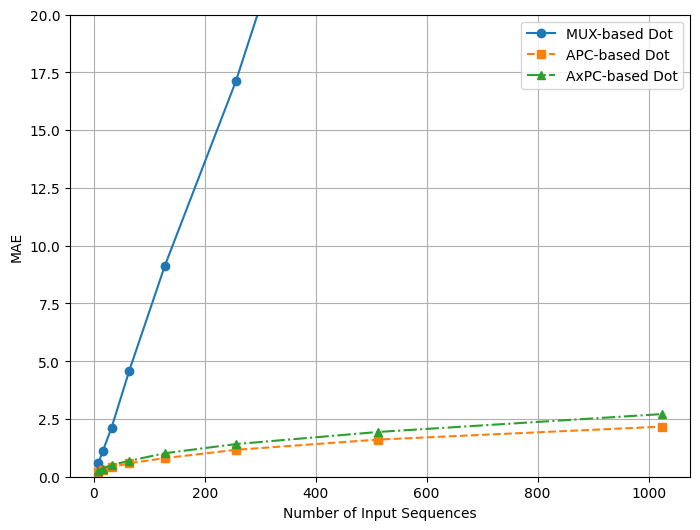

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# 横轴上的点
x_values = [8, 16, 32, 64, 128, 256, 512, 1024]

# 假设函数值为随机生成的一些数据
y_values = [get_mae(128,x) for x in x_values]
y1_values = [y[0] for y in y_values]
y2_values = [y[1] for y in y_values]
y3_values = [y[2] for y in y_values]
# 绘制图像
plt.figure(figsize=(8, 6))
plt.plot(x_values, y1_values, label='MUX-based Dot', marker='o', linestyle='-')
plt.plot(x_values, y2_values, label='APC-based Dot', marker='s', linestyle='--')
plt.plot(x_values, y3_values, label='AxPC-based Dot', marker='^', linestyle='-.')
plt.ylim(0,20)
plt.xlabel('Number of Input Sequences')
plt.ylabel('MAE')
# plt.title('MAE')
plt.grid(True)
plt.legend()
plt.show()
